In [ ]:
#importing neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.models import load_model

In [4]:
#load the data into different sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [6]:
# one hot encoding to easy access and validation
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# convert from integers to float and normalising the values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

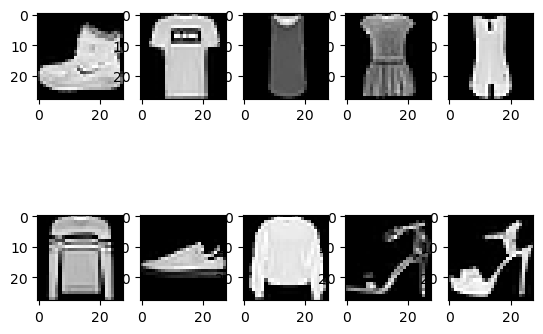

In [8]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
plt.show()

In [9]:
# build cnn model
def build_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
scores = []
histories = []
folds = 5
kfold = KFold(folds, shuffle=True, random_state=1)
X_data = X_train
y_data = y_train
for ix_train, ix_test in kfold.split(X_data):
    model = build_model()
    X_train_, y_train_, X_test_, y_test_ = X_data[ix_train], y_data[ix_train], X_data[ix_test], y_data[ix_test]
    hist = model.fit(X_train_, y_train_, epochs=10, batch_size=32, validation_data=(X_test_, y_test_), verbose=1)
    val_ls, acc = model.evaluate(X_test_, y_test_, verbose=0)
    print("-----------------------------------------------------------------------------------------------------------------------------")
    print("Validation loss in this fold : {0}".format(val_ls))
    print("-----------------------------------------------------------------------------------------------------------------------------")
    print("Accuarcy in this fold : {0:.3f}".format(acc*100))
    print("-----------------------------------------------------------------------------------------------------------------------------")
    scores.append(acc)
    histories.append(hist)
model.save('final_model.h5')

/home/u194053/.local/lib/python3.9/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1500/1500 [==============================] - 23s 14ms/step - loss: 0.4628 - accuracy: 0.8343 - val_loss: 0.3240 - val_accuracy: 0.8855
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2955 - accuracy: 0.8928 - val_loss: 0.2856 - val_accuracy: 0.8935
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2498 - accuracy: 0.9094 - val_loss: 0.2714 - val_accuracy: 0.9030
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2185 - accuracy: 0.9192 - val_loss: 0.2654 - val_accuracy: 0.9036
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1926 - accuracy: 0.9297 - val_loss: 0.2673 - val_accuracy: 0.9039
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1745 - accuracy: 0.9352 - val_loss: 0.2616 - val_accuracy: 0.9093
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1549 - accuracy: 0.9428 - val_loss: 0.2880 -

In [14]:
# Print accuracies of all the folds
print('Scores : ')
print("-------------------------------------------------------------------------------------------------------------------------------")
print(scores)
print("-------------------------------------------------------------------------------------------------------------------------------")
print('Mean Accuracy : {0}'.format(np.mean(scores)))
#validation accuracies of all 10 epochs of first iteration of KFold Cross Validation
print("-------------------------------------------------------------------------------------------------------------------------------")

Scores : 
-------------------------------------------------------------------------------------------------------------------------------
[0.9134166836738586, 0.9076666831970215, 0.9128333330154419, 0.9100000262260437, 0.9120000004768372]
-------------------------------------------------------------------------------------------------------------------------------
Mean Accuracy : 0.9111833453178406
-------------------------------------------------------------------------------------------------------------------------------


### Visualization of the Validation Loss and Accuracy for all folds

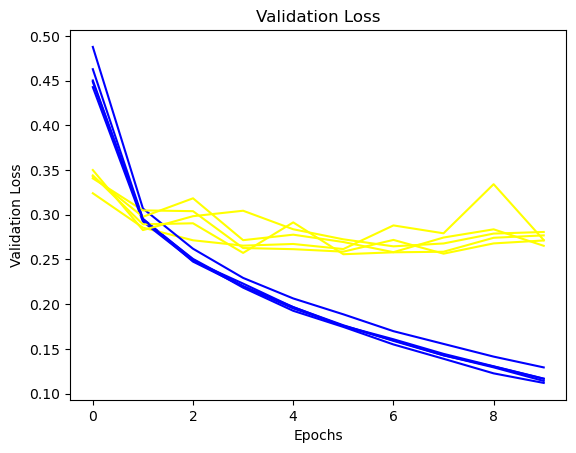

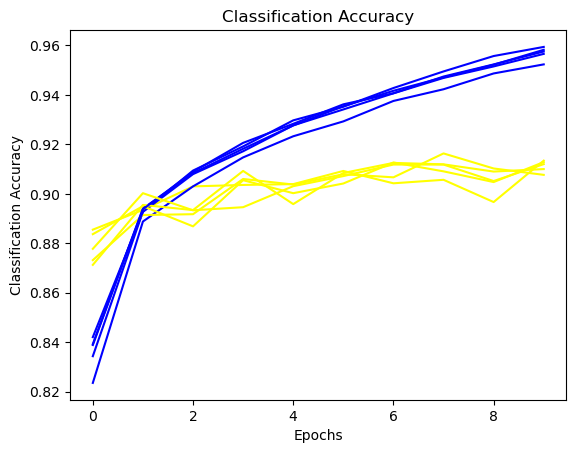

In [15]:
for i in range(len(histories)):
    # plot loss
    plt.title('Validation Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='Training Loss')
    plt.plot(histories[i].history['val_loss'], color='yellow', label='Testing Loss')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epochs')
plt.show()
for i in range(len(histories)):
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue')
    plt.plot(histories[i].history['val_accuracy'], color='yellow')
    plt.ylabel('Classification Accuracy')
    plt.xlabel('Epochs')
plt.show()

In [16]:
predictions = model.predict(X_test)
with open('predictions.csv', 'w') as f:
    f.write('id,label\n')
    for i in range(len(predictions)):
        f.write('%d,%d\n' % (i, predictions[i].argmax()))

313/313 [==============================] - 1s 3ms/step
